In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.style.use('ggplot')
#plt.figure(figsize=(8,4))

In [48]:
train = pd.read_csv('train.csv')

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


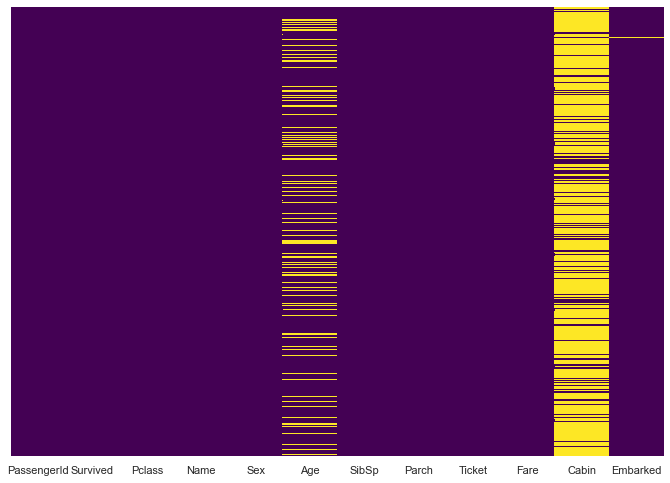

In [51]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<h1>Analise exploratoria de dados.</h1>

In [52]:
sns.set_style('whitegrid')

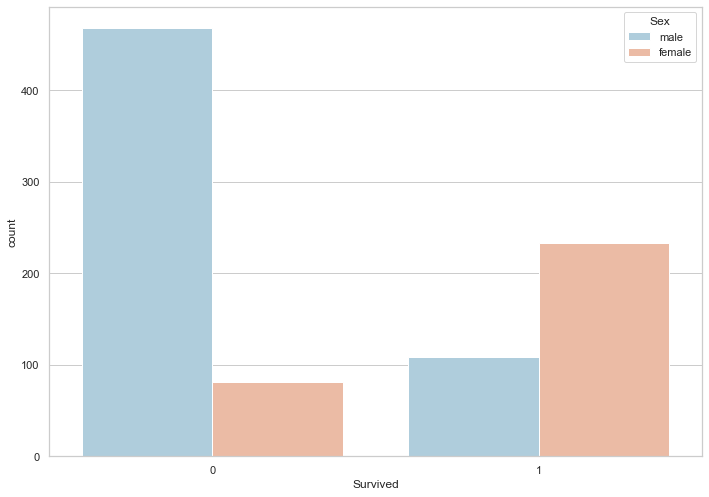

In [53]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

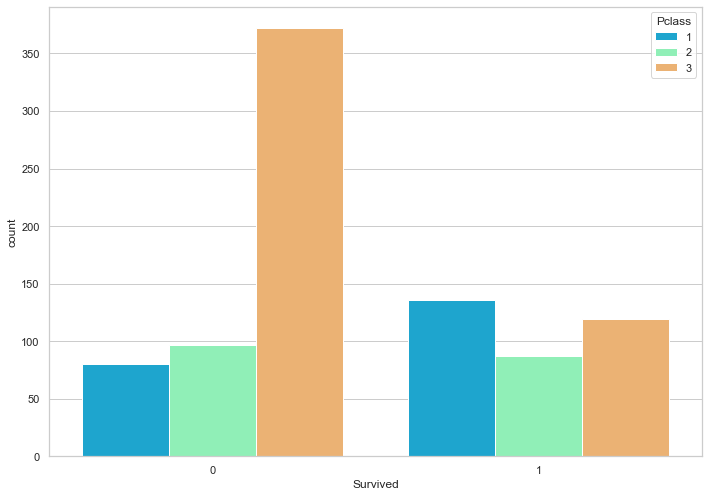

In [54]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')
#Maioria dos sobreviventes é da 1 classe e dos mortos da 3 classe.

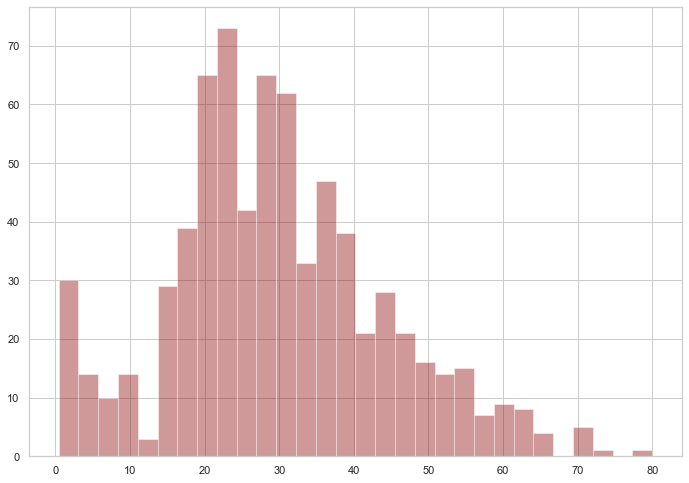

In [55]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4)

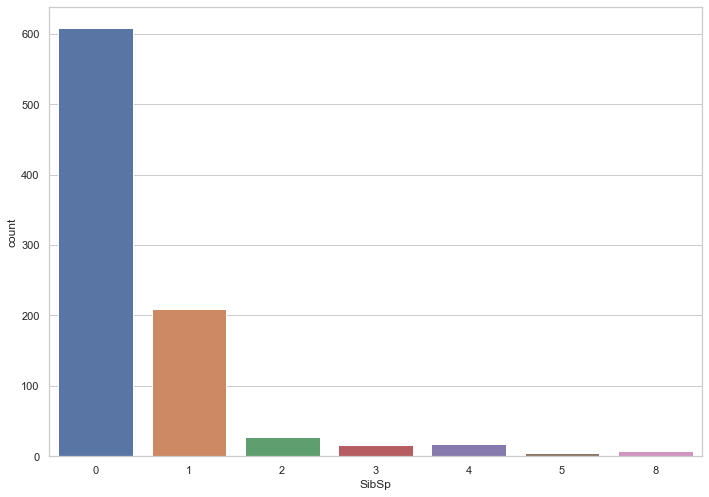

In [56]:
sns.countplot(x='SibSp', data=train)

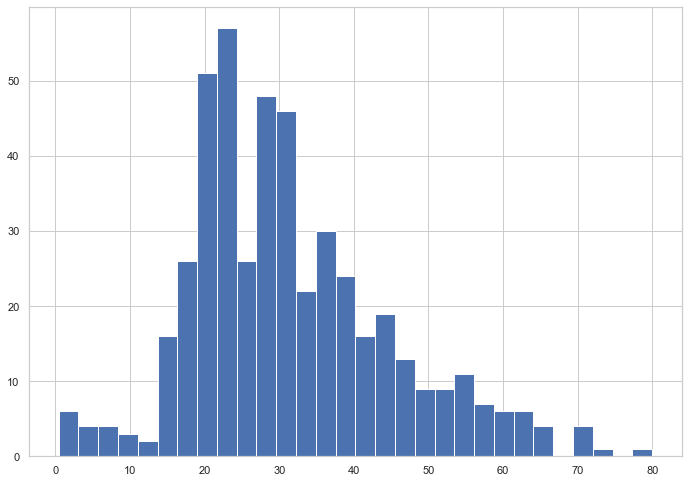

In [57]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

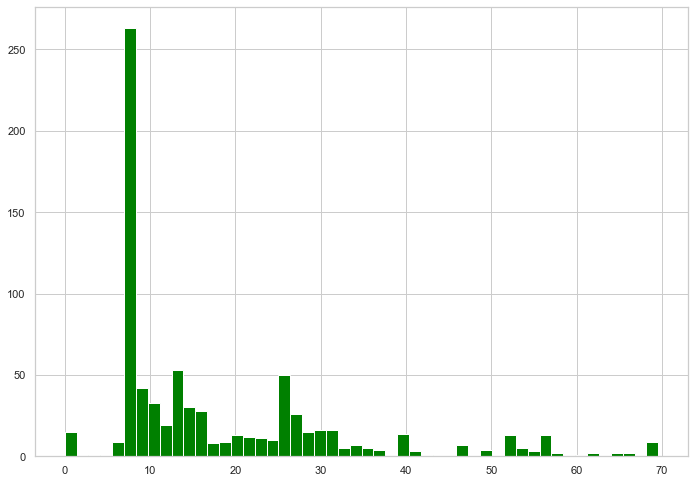

In [58]:
train[train['Fare']<70]['Fare'].hist(color='green', bins=50)

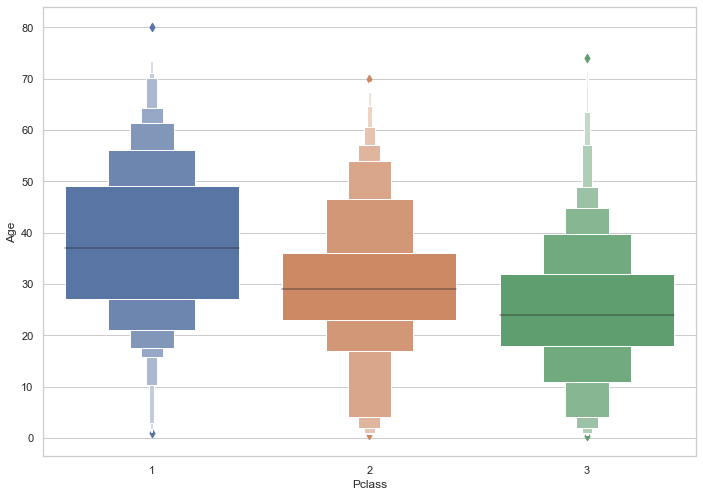

In [59]:
#Media de idade de cada classe
sns.boxenplot(x='Pclass',y='Age',data=train)

In [60]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade
train['Age'] = train[['Age','Pclass']].apply(inputar_idade, axis=1)

In [61]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

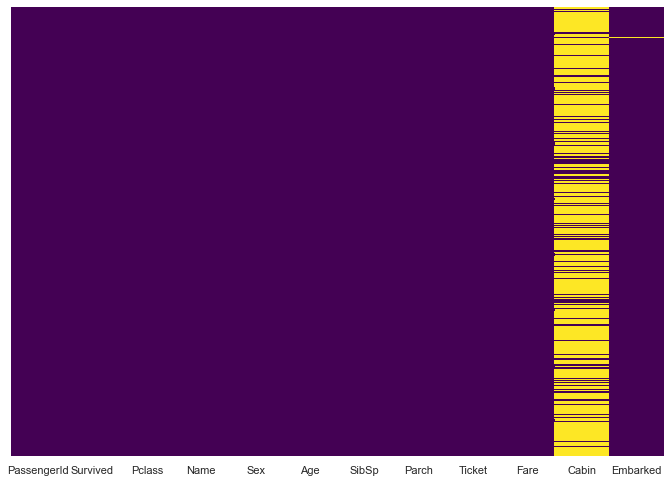

In [62]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [63]:
del train['Cabin']
#train.drop('Cabin',inplace=True)

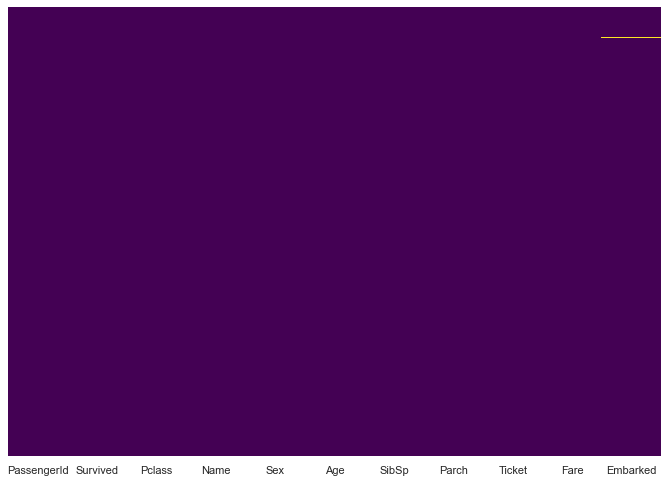

In [64]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [65]:
train.dropna(inplace=True)

In [66]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [68]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [69]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [70]:
train.drop(['Sex','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [71]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [72]:
train = pd.concat([train,sex,embark],axis=1)

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [74]:
del train['Embarked']

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.3)

In [93]:
logmodel = LogisticRegression()

In [94]:
logmodel.fit(X_train, y_train)

/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
prediction = logmodel.predict(X_test)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       163
           1       0.82      0.75      0.78       104

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
print(confusion_matrix(y_test, prediction))

[[146  17]
 [ 26  78]]
